In [101]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [102]:
# Carrega o dataset
df = pd.read_csv(r'C:\Dev\material\archive (1)\vgsales.csv')

In [103]:
df.shape

(16598, 11)

In [104]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [106]:
df.isnull().sum()
#descobrindo quantos valores vazios tem no data frame

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [107]:
df = df.dropna() 
#deletando os valores nulos do data frame 

In [108]:
df.shape

(16291, 11)

In [109]:
# Resumo estatístico do dataset - ATENÇÃO
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [110]:
df.corr()

C:\Users\Sergio\AppData\Local\Temp\ipykernel_12328\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178027,-0.400315,-0.379137,-0.269323,-0.332735,-0.426975
Year,0.178027,1.000000,-0.091285,0.006108,-0.169387,0.041128,-0.074647
NA_Sales,-0.400315,-0.091285,1.000000,0.768923,0.451283,0.634518,0.941269
EU_Sales,-0.379137,0.006108,0.768923,1.000000,0.436379,0.726256,0.903264
JP_Sales,-0.269323,-0.169387,0.451283,0.436379,1.000000,0.290559,0.612774
Other_Sales,-0.332735,0.041128,0.634518,0.726256,0.290559,1.000000,0.747964
Global_Sales,-0.426975,-0.074647,0.941269,0.903264,0.612774,0.747964,1.000000


<Axes: xlabel='Global_Sales', ylabel='NA_Sales'>

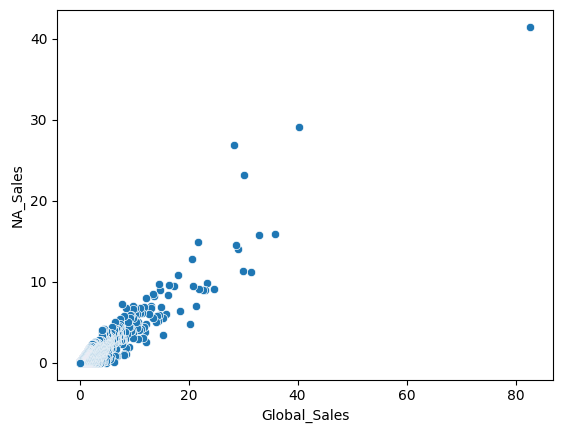

In [111]:
# Vamos analisar a relação entre a as vendas globais e as vendas da regiao NA
sns.scatterplot(data = df, x = "Global_Sales", y = "NA_Sales")

In [112]:
y = df['NA_Sales']
X = df['Global_Sales']

In [113]:
X = sm.add_constant(X)

In [114]:
modelo = sm.OLS(y,X)

In [115]:
resultado = modelo.fit()

In [116]:
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:               NA_Sales   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                 1.266e+05
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:03:53   Log-Likelihood:                -2243.2
No. Observations:               16291   AIC:                             4490.
Df Residuals:                   16289   BIC:                             4506.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0015      0.002     -0.658   

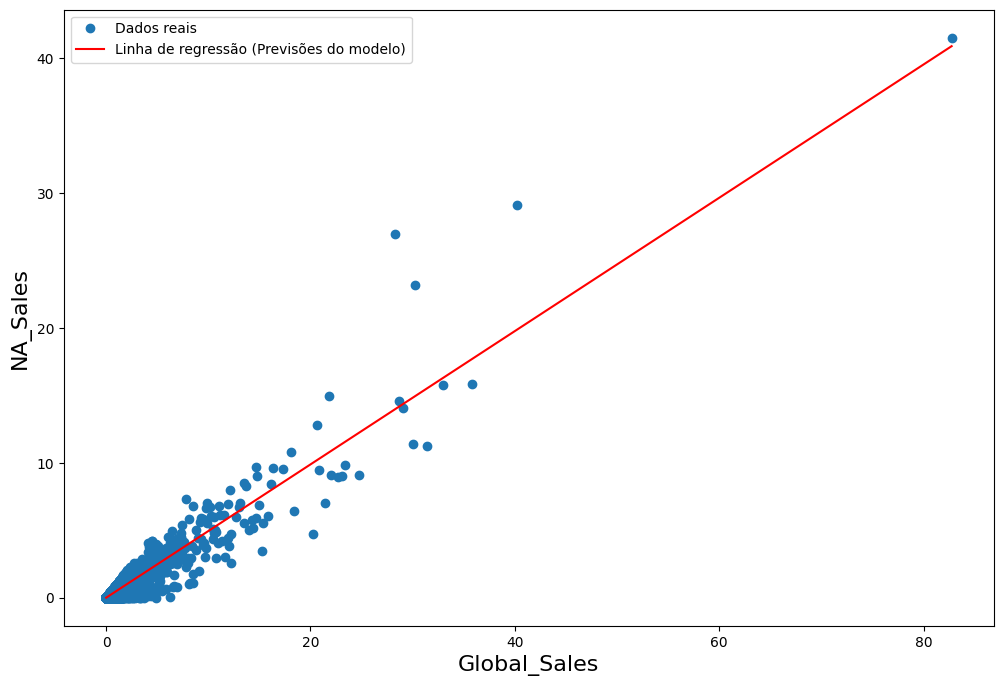

In [117]:
plt.figure(figsize = (12, 8))
plt.xlabel('Global_Sales', size= 16)
plt.ylabel('NA_Sales', size= 16)
plt.plot(X['Global_Sales'], y , 'o', label = 'Dados reais')
plt.plot(X['Global_Sales'], resultado.fittedvalues, 'r-', label = 'Linha de regressão (Previsões do modelo)')
plt.legend(loc = 'best')
plt.show()

Finalmente chegamos a conclusão que as vendas Globais tem forte relação com as vendas da região North America (NA)

In [118]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [119]:
#filtrando as vendas de jogos pelo genero sports
df_gen = df[df['Genre'] == 'Sports']

In [120]:
df_gen

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
13,14,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
...,...,...,...,...,...,...,...,...,...,...,...
16576,16579,Rugby Challenge 3,XOne,2016.0,Sports,Alternative Software,0.00,0.01,0.00,0.00,0.01
16578,16581,Outdoors Unleashed: Africa 3D,3DS,2011.0,Sports,Mastiff,0.01,0.00,0.00,0.00,0.01
16579,16582,PGA European Tour,N64,2000.0,Sports,Infogrames,0.01,0.00,0.00,0.00,0.01
16581,16584,Fit & Fun,Wii,2011.0,Sports,Unknown,0.00,0.01,0.00,0.00,0.01


Agora vamos tentar descobrir qual região teve o maior valor de vendas de jogos desse genero (sports)

In [121]:
# Ordenar as colunas de vendas em ordem decrescente
df_sorted = df[['NA_Sales', 'EU_Sales', 'JP_Sales']].sort_values(by=['NA_Sales', 'EU_Sales', 'JP_Sales'], ascending=False)


In [122]:
df_sorted

,NA_Sales,EU_Sales,JP_Sales
0,41.49,29.02,3.77
1,29.08,3.58,6.81
9,26.93,0.63,0.28
5,23.20,2.26,4.22
2,15.85,12.88,3.79
...,...,...,...
16587,0.00,0.00,0.01
16589,0.00,0.00,0.01
16590,0.00,0.00,0.01
8055,0.00,0.00,0.00


In [123]:
df_sorted.sum()

NA_Sales    4327.65
EU_Sales    2406.69
JP_Sales    1284.27
dtype: float64

Concluimos que a região NA domina as vendas de jogos do gênero Esportes

In [125]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Qual o total de vendas globais por genero 

In [128]:
df_p3 = df.groupby('Genre')['Global_Sales'].sum().reset_index().sort_values(by = 'Global_Sales', ascending = False)
#nessa linha agrupamos as colunas Genre e Globlal_Sales para somar os valores de Global_Sales com base no genero
#e ordenar os valore por ordem decrescente usando .sort_values(ascendig = False)

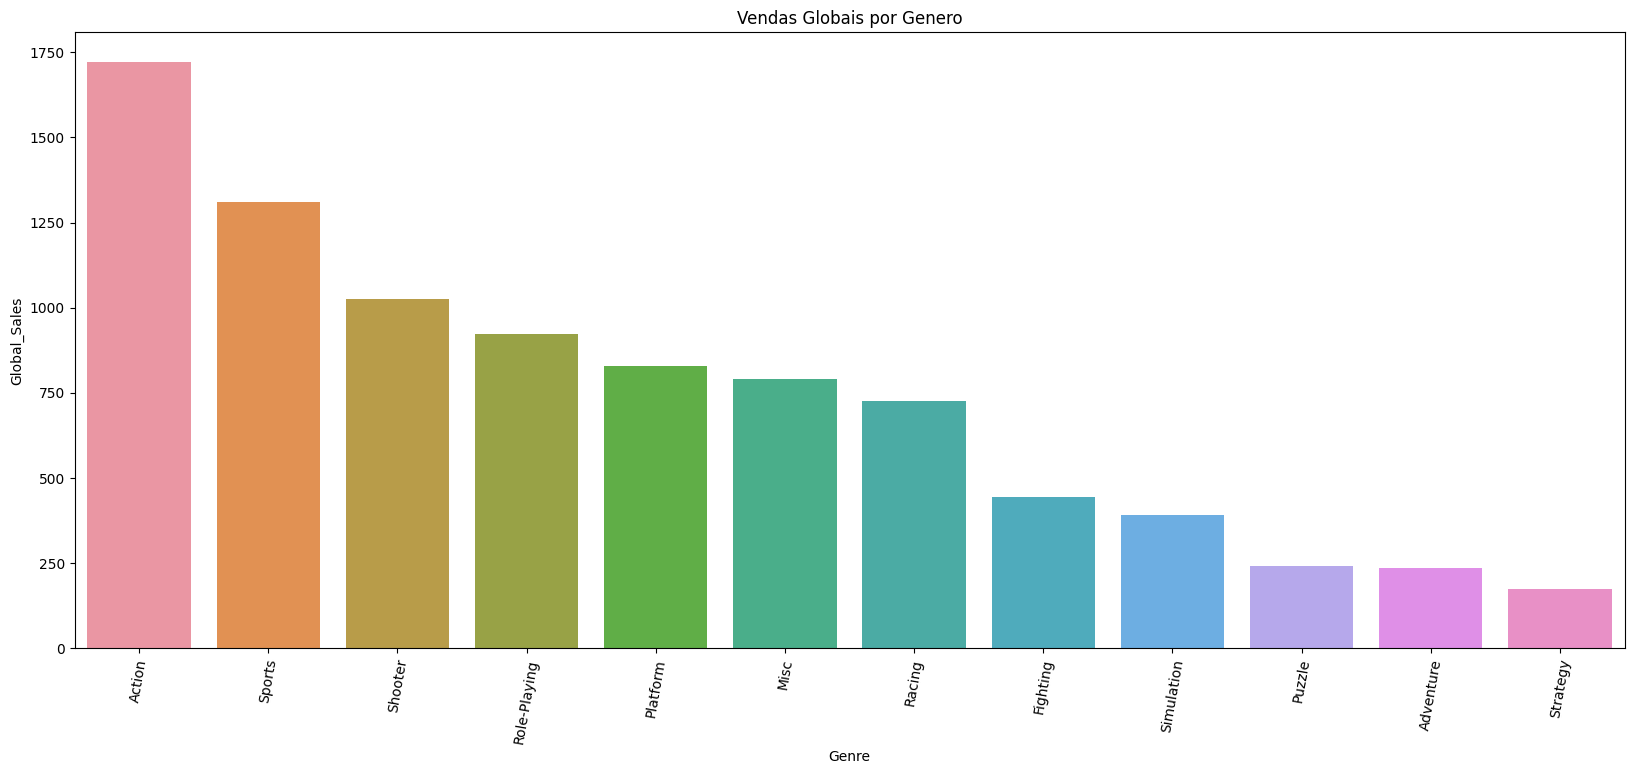

In [130]:
plt.figure(figsize = (20,8))
sns.barplot(data = df_p3,
y= 'Global_Sales',
x = 'Genre').set(title = 'Vendas Globais por Genero')
plt.xticks(rotation = 80)
plt.show()